<a href="https://colab.research.google.com/github/nestorm94/Aprendizaje_Maquinas/blob/main/validaci%C3%B2n_cruzada_test_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
test = pd.read_csv("/content/sample_data/mnist_test.csv",header =None)

In [ ]:
X = train.iloc[:, 1:].to_numpy()
y = train.iloc[:,0].to_numpy()

In [ ]:
X_hut = test.iloc[:, 1:].to_numpy()
y_hut = test.iloc[:,0].to_numpy()

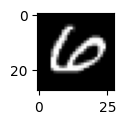

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X[0,:].reshape(28,28),cmap='gray')

In [ ]:
result = cross_validate(DecisionTreeClassifier(max_depth=10),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

In [ ]:
result

{'fit_time': array([3.11703968, 6.12099028, 5.30402374, 7.75621819, 3.92418408,
        2.92630053, 3.72198844, 2.88975525, 2.89210939, 2.90787649]),
 'score_time': array([0.00610185, 0.00586557, 0.01371813, 0.00587606, 0.00419426,
        0.00435972, 0.00589061, 0.00444794, 0.0043149 , 0.00432253]),
 'estimator': [DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10)],
 'test_score': array([0.8395, 0.8335, 0.8325, 0.847 , 0.831 , 0.8425, 0.833 , 0.83  ,
        0.848 , 0.8365]),
 'train_score': array([0.927     , 0.92461111, 0.92366667, 0.92477778, 0.92505556,
        0.9265    , 0.92433333, 0.92733333, 0.92422222, 0.92716667])}

In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(result["train_score"].mean()*100,result['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(result["test_score"].mean()*100,result['test_score'].std()*100))

acc train: 92.55% +- 0.13
acc test: 83.73% +- 0.62


In [ ]:
res_5 = cross_validate(DecisionTreeClassifier(max_depth=50),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(res_5["train_score"].mean()*100,res_5['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(res_5["test_score"].mean()*100,res_5['test_score'].std()*100))

acc train: 100.00% +- 0.00
acc test: 83.67% +- 0.93


In [ ]:
res_100 = cross_validate(DecisionTreeClassifier(max_depth=100),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(res_100["train_score"].mean()*100,res_100['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(res_100["test_score"].mean()*100,res_100['test_score'].std()*100))

acc train: 100.00% +- 0.00
acc test: 83.48% +- 1.12


In [ ]:
modelo = DecisionTreeClassifier(max_depth=100)

In [ ]:
modelo.fit(X, y)

DecisionTreeClassifier(max_depth=100)

In [ ]:
modelo.predict(X_hut)

array([7, 2, 1, ..., 4, 1, 6])

In [ ]:
print("trein:",accuracy_score(y, modelo.predict(X))*100,"%")

print("val:",accuracy_score(y_hut, modelo.predict(X_hut))*100,"%")

trein: 100.0 %
val: 84.09 %


[Text(0.41869918704512676, 0.9857142857142858, 'x[409] <= 0.5\ngini = 0.9\nsamples = 20000\nvalue = [1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912\n2023]'),
 Text(0.1634390931043735, 0.9571428571428572, 'x[434] <= 0.5\ngini = 0.815\nsamples = 6628\nvalue = [1641, 1989, 553, 411, 116, 753, 375, 196, 502, 92]'),
 Text(0.07954789374832305, 0.9285714285714286, 'x[455] <= 0.5\ngini = 0.562\nsamples = 2497\nvalue = [1611, 5, 135, 152, 29, 238, 150, 126, 19, 32]'),
 Text(0.04561756551292371, 0.9, 'x[352] <= 2.5\ngini = 0.827\nsamples = 839\nvalue = [197, 5, 75, 137, 7, 195, 107, 95, 15, 6]'),
 Text(0.020525892138449155, 0.8714285714285714, 'x[518] <= 2.0\ngini = 0.772\nsamples = 518\nvalue = [189, 3, 54, 8, 3, 103, 87, 65, 2, 4]'),
 Text(0.010070655576424292, 0.8428571428571429, 'x[598] <= 8.0\ngini = 0.551\nsamples = 282\nvalue = [179, 1, 16, 1, 1, 20, 10, 54, 0, 0]'),
 Text(0.003148197835613988, 0.8142857142857143, 'x[182] <= 9.5\ngini = 0.527\nsamples = 83\nvalue = [17, 0, 1, 1, 0, 

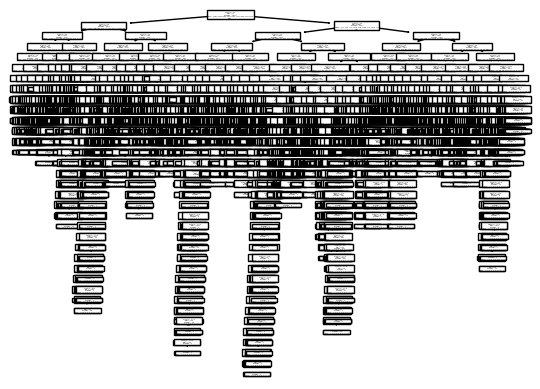

In [ ]:
plot_tree(modelo)